# Question 1

In [2]:
# Package Import
from datetime import datetime
import tensorflow as tf
from tensorflow import keras
import tensorboard
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# import MNIST dataset
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()
train_images = train_images / 255.0

x_train = train_images.reshape(-1,28,28,1)
x_test = test_images.reshape(-1,28,28,1)
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


## 1st model--Number of filters increases as the layers

Hyperparameters Setups

*   Learning rate: 0.001,0.0001
*   Batch size: 256, 512, 1024
*   Optimizer: SGD, adam, RMSProp

In [30]:
# Learning rate and Batch size 
LR = 0.0001
BS = 1024
CNN_model_1 = keras.models.Sequential()

# Model Setups

CNN_model_1.add(keras.layers.Conv2D(8,(3,3), padding='same', activation='relu'))
CNN_model_1.add(keras.layers.Conv2D(16,(3,3), padding='same', activation='relu'))
CNN_model_1.add(keras.layers.Conv2D(24,(3,3), padding='same', activation='relu'))
CNN_model_1.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
#-------------------------------
CNN_model_1.add(keras.layers.Conv2D(32,(3,3), padding='same', activation='relu'))
CNN_model_1.add(keras.layers.Conv2D(40,(3,3), padding='same', activation='relu'))
CNN_model_1.add(keras.layers.Conv2D(48,(3,3), padding='same', activation='relu'))
CNN_model_1.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
#-------------------------------
CNN_model_1.add(keras.layers.Conv2D(56,(3,3), padding='same', activation='relu'))
CNN_model_1.add(keras.layers.Conv2D(64,(3,3),  padding='same', activation='relu'))
CNN_model_1.add(keras.layers.Conv2D(72,(3,3), padding='same', activation='relu'))
CNN_model_1.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
#-------------------------------
CNN_model_1.add(keras.layers.Conv2D(80,(3,3),  padding='same', activation='relu'))
CNN_model_1.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
# Fully connected layer
CNN_model_1.add(keras.layers.Flatten())
CNN_model_1.add(keras.layers.Dense(256))
CNN_model_1.add(keras.layers.Activation('relu'))
# Output layer
CNN_model_1.add(tf.keras.layers.Dense(10))
CNN_model_1.add(tf.keras.layers.Activation('softmax'))

#compile
CNN_model_1.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=LR), metrics=['accuracy'])
CNN_model_1.build(input_shape=(1,28,28,1))
# CNN_model_1.summary()


## Model Training

### Adam Optimizer

In [31]:
logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)
# Train the model.
CNN_model_1.fit(
    x_train,
    train_labels, 
    batch_size=BS,
    epochs=10, 
    callbacks=[tensorboard_callback])
score = CNN_model_1.evaluate(x_test,test_labels)
print('Optimizer: Adam, Learning rate: %s, Batch size: %s'%(str(LR), str(BS)))
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

Epoch 1/10
59/59 [==============================] - 4s 61ms/step - loss: 2.2061 - accuracy: 0.2236
Epoch 2/10
59/59 [==============================] - 4s 61ms/step - loss: 0.8274 - accuracy: 0.7573
Epoch 3/10
59/59 [==============================] - 4s 61ms/step - loss: 0.3788 - accuracy: 0.8860
Epoch 4/10
59/59 [==============================] - 4s 62ms/step - loss: 0.2361 - accuracy: 0.9288
Epoch 5/10
59/59 [==============================] - 4s 61ms/step - loss: 0.1781 - accuracy: 0.9460
Epoch 6/10
59/59 [==============================] - 4s 61ms/step - loss: 0.1488 - accuracy: 0.9541
Epoch 7/10
59/59 [==============================] - 4s 61ms/step - loss: 0.1317 - accuracy: 0.9592
Epoch 8/10
59/59 [==============================] - 4s 60ms/step - loss: 0.1133 - accuracy: 0.9652
Epoch 9/10
59/59 [==============================] - 4s 62ms/step - loss: 0.1052 - accuracy: 0.9677
Epoch 10/10
313/313 [==============================] - 1s 4ms/step - loss: 10.3538 - accuracy: 0.9727
Optimiz

### Accuracy with different setups with Adam optimizer

\begin{array}{ccc}
BS\LR&0.001&0.0001\\
256&0.992&0.981\\
512&0.992&0.977\\
1024&0.990&0.973\\
\end{array}

According to the table above, we can see that for Adam optimizer, the accurcy is the highest when batch size is 256 or 512 and learning rate is 0.001.

### RMSprop Optimizer

In [38]:
# Learning rate and Batch size 
LR = 0.0001
BS = 1024
CNN_model_1 = keras.models.Sequential()

# Model Setups

CNN_model_1.add(keras.layers.Conv2D(8,(3,3), padding='same', activation='relu'))
CNN_model_1.add(keras.layers.Conv2D(16,(3,3), padding='same', activation='relu'))
CNN_model_1.add(keras.layers.Conv2D(24,(3,3), padding='same', activation='relu'))
CNN_model_1.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
#-------------------------------
CNN_model_1.add(keras.layers.Conv2D(32,(3,3), padding='same', activation='relu'))
CNN_model_1.add(keras.layers.Conv2D(40,(3,3), padding='same', activation='relu'))
CNN_model_1.add(keras.layers.Conv2D(48,(3,3), padding='same', activation='relu'))
CNN_model_1.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
#-------------------------------
CNN_model_1.add(keras.layers.Conv2D(56,(3,3), padding='same', activation='relu'))
CNN_model_1.add(keras.layers.Conv2D(64,(3,3),  padding='same', activation='relu'))
CNN_model_1.add(keras.layers.Conv2D(72,(3,3), padding='same', activation='relu'))
CNN_model_1.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
#-------------------------------
CNN_model_1.add(keras.layers.Conv2D(80,(3,3),  padding='same', activation='relu'))
CNN_model_1.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
# Fully connected layer
CNN_model_1.add(keras.layers.Flatten())
CNN_model_1.add(keras.layers.Dense(256))
CNN_model_1.add(keras.layers.Activation('relu'))
# Output layer
CNN_model_1.add(tf.keras.layers.Dense(10))
CNN_model_1.add(tf.keras.layers.Activation('softmax'))

#compile
CNN_model_1.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.RMSprop(learning_rate=LR), metrics=['accuracy'])
CNN_model_1.build(input_shape=(1,28,28,1))
# CNN_model_1.summary()

logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)
# Train the model.
CNN_model_1.fit(
    x_train,
    train_labels, 
    batch_size=BS,
    epochs=10, 
    callbacks=[tensorboard_callback])
score = CNN_model_1.evaluate(x_test,test_labels)
print('Optimizer: RMSprop, Learning rate: %s, Batch size: %s'%(str(LR), str(BS)))
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

Epoch 1/10
59/59 [==============================] - 5s 61ms/step - loss: 1.7744 - accuracy: 0.4674
Epoch 2/10
59/59 [==============================] - 4s 61ms/step - loss: 0.7374 - accuracy: 0.7642
Epoch 3/10
59/59 [==============================] - 4s 60ms/step - loss: 0.5178 - accuracy: 0.8331
Epoch 4/10
59/59 [==============================] - 4s 61ms/step - loss: 0.4044 - accuracy: 0.8724
Epoch 5/10
59/59 [==============================] - 4s 60ms/step - loss: 0.3251 - accuracy: 0.8995
Epoch 6/10
59/59 [==============================] - 4s 61ms/step - loss: 0.2659 - accuracy: 0.9183
Epoch 7/10
59/59 [==============================] - 4s 61ms/step - loss: 0.2203 - accuracy: 0.9316
Epoch 8/10
59/59 [==============================] - 4s 61ms/step - loss: 0.1892 - accuracy: 0.9406
Epoch 9/10
59/59 [==============================] - 4s 61ms/step - loss: 0.1631 - accuracy: 0.9494
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss: 20.8818 - accuracy: 0.9547
Optimiz

### Accuracy with different setups with RMSprop optimizer

\begin{array}{ccc}
BS\LR&0.001&0.0001\\
256&0.989&0.983\\
512&0.983&0.965\\
1024&0.988&0.955\\
\end{array}

According to the table above, we can see that for RMSprop optimizer, the accurcy is the highest when batch size is 1024 and learning rate is 0.0001.

### SGD Optimier

In [45]:
# Learning rate and Batch size 
LR = 0.0001
BS = 1024
CNN_model_1 = keras.models.Sequential()

# Model Setups

CNN_model_1.add(keras.layers.Conv2D(8,(3,3), padding='same', activation='relu'))
CNN_model_1.add(keras.layers.Conv2D(16,(3,3), padding='same', activation='relu'))
CNN_model_1.add(keras.layers.Conv2D(24,(3,3), padding='same', activation='relu'))
CNN_model_1.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
#-------------------------------
CNN_model_1.add(keras.layers.Conv2D(32,(3,3), padding='same', activation='relu'))
CNN_model_1.add(keras.layers.Conv2D(40,(3,3), padding='same', activation='relu'))
CNN_model_1.add(keras.layers.Conv2D(48,(3,3), padding='same', activation='relu'))
CNN_model_1.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
#-------------------------------
CNN_model_1.add(keras.layers.Conv2D(56,(3,3), padding='same', activation='relu'))
CNN_model_1.add(keras.layers.Conv2D(64,(3,3),  padding='same', activation='relu'))
CNN_model_1.add(keras.layers.Conv2D(72,(3,3), padding='same', activation='relu'))
CNN_model_1.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
#-------------------------------
CNN_model_1.add(keras.layers.Conv2D(80,(3,3),  padding='same', activation='relu'))
CNN_model_1.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
# Fully connected layer
CNN_model_1.add(keras.layers.Flatten())
CNN_model_1.add(keras.layers.Dense(256))
CNN_model_1.add(keras.layers.Activation('relu'))
# Output layer
CNN_model_1.add(tf.keras.layers.Dense(10))
CNN_model_1.add(tf.keras.layers.Activation('softmax'))

#compile
CNN_model_1.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.SGD(learning_rate=LR), metrics=['accuracy'])
CNN_model_1.build(input_shape=(1,28,28,1))
# CNN_model_1.summary()

logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)
# Train the model.
CNN_model_1.fit(
    x_train,
    train_labels, 
    batch_size=BS,
    epochs=10, 
    callbacks=[tensorboard_callback])
score = CNN_model_1.evaluate(x_test,test_labels)
print('Optimizer: Adam, Learning rate: %s, Batch size: %s'%(str(LR), str(BS)))
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

Epoch 1/10
59/59 [==============================] - 4s 60ms/step - loss: 2.3026 - accuracy: 0.1138
Epoch 2/10
59/59 [==============================] - 3s 59ms/step - loss: 2.3026 - accuracy: 0.1132
Epoch 3/10
59/59 [==============================] - 3s 59ms/step - loss: 2.3026 - accuracy: 0.1127
Epoch 4/10
59/59 [==============================] - 3s 59ms/step - loss: 2.3026 - accuracy: 0.1124
Epoch 5/10
59/59 [==============================] - 4s 60ms/step - loss: 2.3026 - accuracy: 0.1124
Epoch 6/10
59/59 [==============================] - 4s 60ms/step - loss: 2.3025 - accuracy: 0.1124
Epoch 7/10
59/59 [==============================] - 4s 61ms/step - loss: 2.3025 - accuracy: 0.1124
Epoch 8/10
59/59 [==============================] - 4s 61ms/step - loss: 2.3025 - accuracy: 0.1124
Epoch 9/10
59/59 [==============================] - 4s 61ms/step - loss: 2.3025 - accuracy: 0.1124
Epoch 10/10
313/313 [==============================] - 1s 4ms/step - loss: 2.9912 - accuracy: 0.1152
Optimize

### Accuracy with different setups with SGD optimizer

\begin{array}{ccc}
BS\LR&0.001&0.0001\\
256&0.098&0.100\\
512&0.089&0.095\\
1024&0.153&0.115\\
\end{array}

According to the table above, we can see that for SGD optimizer, the accurcy is not stable. So, SGD optimizer is not an ideal optimizer for this case.

### Summary

According to the tables above, we can see the accuracy is the highest when the batch size is 256 or 512 and the learning rate is 0.001, with Adam optimizer.

## 2nd Model--Number of filters decreases as the layers

### Adam Optimizer

In [51]:
# Learning rate and Batch size 
LR = 0.0001
BS = 1024
CNN_model_2 = keras.models.Sequential()

# Model Setups

CNN_model_2.add(keras.layers.Conv2D(80,(3,3), padding='same', activation='relu'))
CNN_model_2.add(keras.layers.Conv2D(72,(3,3), padding='same', activation='relu'))
CNN_model_2.add(keras.layers.Conv2D(64,(3,3), padding='same', activation='relu'))
CNN_model_2.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
#-------------------------------
CNN_model_2.add(keras.layers.Conv2D(56,(3,3), padding='same', activation='relu'))
CNN_model_2.add(keras.layers.Conv2D(48,(3,3), padding='same', activation='relu'))
CNN_model_2.add(keras.layers.Conv2D(40,(3,3), padding='same', activation='relu'))
CNN_model_2.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
#-------------------------------
CNN_model_2.add(keras.layers.Conv2D(32,(3,3), padding='same', activation='relu'))
CNN_model_2.add(keras.layers.Conv2D(24,(3,3),  padding='same', activation='relu'))
CNN_model_2.add(keras.layers.Conv2D(16,(3,3), padding='same', activation='relu'))
CNN_model_2.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
#-------------------------------
CNN_model_2.add(keras.layers.Conv2D(8,(3,3),  padding='same', activation='relu'))
CNN_model_2.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
# Fully connected layer
CNN_model_2.add(keras.layers.Flatten())
CNN_model_2.add(keras.layers.Dense(256))
CNN_model_2.add(keras.layers.Activation('relu'))
# Output layer
CNN_model_2.add(tf.keras.layers.Dense(10))
CNN_model_2.add(tf.keras.layers.Activation('softmax'))

#compile
CNN_model_2.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=LR), metrics=['accuracy'])
CNN_model_2.build(input_shape=(1,28,28,1))
# CNN_model_2.summary()

logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)
# Train the model.
CNN_model_2.fit(
    x_train,
    train_labels, 
    batch_size=BS,
    epochs=10, 
    callbacks=[tensorboard_callback])
score = CNN_model_2.evaluate(x_test,test_labels)
print('Optimizer: Adam, Learning rate: %s, Batch size: %s'%(str(LR), str(BS)))
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

Epoch 1/10
59/59 [==============================] - 11s 174ms/step - loss: 2.2514 - accuracy: 0.3093
Epoch 2/10
59/59 [==============================] - 11s 182ms/step - loss: 1.0434 - accuracy: 0.6677
Epoch 3/10
59/59 [==============================] - 11s 182ms/step - loss: 0.4603 - accuracy: 0.8670
Epoch 4/10
59/59 [==============================] - 11s 181ms/step - loss: 0.3314 - accuracy: 0.9060
Epoch 5/10
59/59 [==============================] - 10s 176ms/step - loss: 0.2670 - accuracy: 0.9237
Epoch 6/10
59/59 [==============================] - 10s 172ms/step - loss: 0.2294 - accuracy: 0.9333
Epoch 7/10
59/59 [==============================] - 10s 173ms/step - loss: 0.1982 - accuracy: 0.9420
Epoch 8/10
59/59 [==============================] - 10s 175ms/step - loss: 0.1773 - accuracy: 0.9482
Epoch 9/10
59/59 [==============================] - 10s 175ms/step - loss: 0.1648 - accuracy: 0.9517
Epoch 10/10
313/313 [==============================] - 2s 4ms/step - loss: 25.0533 - accura

### Accuracy with different setups with Adam optimizer

\begin{array}{ccc}
BS\LR&0.001&0.0001\\
256&0.990&0.973\\
512&0.989&0.954\\
1024&0.987&0.953\\
\end{array}

According to the table above, we can see that for Adam optimizer, the accurcy is the highest when the batch size is 256 and the learning rate is 0.001.

### RMSprop optimizer

In [58]:
# Learning rate and Batch size 
LR = 0.0001
BS = 1024
CNN_model_2 = keras.models.Sequential()

# Model Setups

CNN_model_2.add(keras.layers.Conv2D(80,(3,3), padding='same', activation='relu'))
CNN_model_2.add(keras.layers.Conv2D(72,(3,3), padding='same', activation='relu'))
CNN_model_2.add(keras.layers.Conv2D(64,(3,3), padding='same', activation='relu'))
CNN_model_2.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
#-------------------------------
CNN_model_2.add(keras.layers.Conv2D(56,(3,3), padding='same', activation='relu'))
CNN_model_2.add(keras.layers.Conv2D(48,(3,3), padding='same', activation='relu'))
CNN_model_2.add(keras.layers.Conv2D(40,(3,3), padding='same', activation='relu'))
CNN_model_2.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
#-------------------------------
CNN_model_2.add(keras.layers.Conv2D(32,(3,3), padding='same', activation='relu'))
CNN_model_2.add(keras.layers.Conv2D(24,(3,3),  padding='same', activation='relu'))
CNN_model_2.add(keras.layers.Conv2D(16,(3,3), padding='same', activation='relu'))
CNN_model_2.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
#-------------------------------
CNN_model_2.add(keras.layers.Conv2D(8,(3,3),  padding='same', activation='relu'))
CNN_model_2.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
# Fully connected layer
CNN_model_2.add(keras.layers.Flatten())
CNN_model_2.add(keras.layers.Dense(256))
CNN_model_2.add(keras.layers.Activation('relu'))
# Output layer
CNN_model_2.add(tf.keras.layers.Dense(10))
CNN_model_2.add(tf.keras.layers.Activation('softmax'))

#compile
CNN_model_2.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.RMSprop(learning_rate=LR), metrics=['accuracy'])
CNN_model_2.build(input_shape=(1,28,28,1))
# CNN_model_2.summary()

logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)
# Train the model.
CNN_model_2.fit(
    x_train,
    train_labels, 
    batch_size=BS,
    epochs=10, 
    callbacks=[tensorboard_callback])
score = CNN_model_2.evaluate(x_test,test_labels)
print('Optimizer: RMSProp, Learning rate: %s, Batch size: %s'%(str(LR), str(BS)))
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

Epoch 1/10
59/59 [==============================] - 12s 174ms/step - loss: 2.1268 - accuracy: 0.1981
Epoch 2/10
59/59 [==============================] - 11s 182ms/step - loss: 1.0239 - accuracy: 0.6383
Epoch 3/10
59/59 [==============================] - 11s 182ms/step - loss: 0.5985 - accuracy: 0.8046
Epoch 4/10
59/59 [==============================] - 11s 182ms/step - loss: 0.4671 - accuracy: 0.8486
Epoch 5/10
59/59 [==============================] - 10s 177ms/step - loss: 0.4040 - accuracy: 0.8725
Epoch 6/10
59/59 [==============================] - 10s 175ms/step - loss: 0.3542 - accuracy: 0.8880
Epoch 7/10
59/59 [==============================] - 10s 173ms/step - loss: 0.3141 - accuracy: 0.9006
Epoch 8/10
59/59 [==============================] - 10s 174ms/step - loss: 0.2814 - accuracy: 0.9114
Epoch 9/10
59/59 [==============================] - 10s 175ms/step - loss: 0.2527 - accuracy: 0.9218
Epoch 10/10
313/313 [==============================] - 1s 4ms/step - loss: 34.6600 - accura

### Accuracy with different setups with RMSProp optimizer

\begin{array}{ccc}
BS\LR&0.001&0.0001\\
256&0.947&0.979\\
512&0.881&0.953\\
1024&0.988&0.925\\
\end{array}

According to the table above, we can see that for RMSprop optimizer, the accurcy is the highest when the batch size is 1024 and the learning rate is 0.001.

### SGD Optimizer

In [64]:
# Learning rate and Batch size 
LR = 0.0001
BS = 1024
CNN_model_2 = keras.models.Sequential()

# Model Setups

CNN_model_2.add(keras.layers.Conv2D(80,(3,3), padding='same', activation='relu'))
CNN_model_2.add(keras.layers.Conv2D(72,(3,3), padding='same', activation='relu'))
CNN_model_2.add(keras.layers.Conv2D(64,(3,3), padding='same', activation='relu'))
CNN_model_2.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
#-------------------------------
CNN_model_2.add(keras.layers.Conv2D(56,(3,3), padding='same', activation='relu'))
CNN_model_2.add(keras.layers.Conv2D(48,(3,3), padding='same', activation='relu'))
CNN_model_2.add(keras.layers.Conv2D(40,(3,3), padding='same', activation='relu'))
CNN_model_2.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
#-------------------------------
CNN_model_2.add(keras.layers.Conv2D(32,(3,3), padding='same', activation='relu'))
CNN_model_2.add(keras.layers.Conv2D(24,(3,3),  padding='same', activation='relu'))
CNN_model_2.add(keras.layers.Conv2D(16,(3,3), padding='same', activation='relu'))
CNN_model_2.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
#-------------------------------
CNN_model_2.add(keras.layers.Conv2D(8,(3,3),  padding='same', activation='relu'))
CNN_model_2.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
# Fully connected layer
CNN_model_2.add(keras.layers.Flatten())
CNN_model_2.add(keras.layers.Dense(256))
CNN_model_2.add(keras.layers.Activation('relu'))
# Output layer
CNN_model_2.add(tf.keras.layers.Dense(10))
CNN_model_2.add(tf.keras.layers.Activation('softmax'))

#compile
CNN_model_2.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.SGD(learning_rate=LR), metrics=['accuracy'])
CNN_model_2.build(input_shape=(1,28,28,1))
# CNN_model_2.summary()

logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)
# Train the model.
CNN_model_2.fit(
    x_train,
    train_labels, 
    batch_size=BS,
    epochs=10, 
    callbacks=[tensorboard_callback])
score = CNN_model_2.evaluate(x_test,test_labels)
print('Optimizer: SGD, Learning rate: %s, Batch size: %s'%(str(LR), str(BS)))
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

Epoch 1/10
59/59 [==============================] - 11s 174ms/step - loss: 2.3025 - accuracy: 0.1304
Epoch 2/10
59/59 [==============================] - 11s 181ms/step - loss: 2.3025 - accuracy: 0.1279
Epoch 3/10
59/59 [==============================] - 11s 182ms/step - loss: 2.3025 - accuracy: 0.1254
Epoch 4/10
59/59 [==============================] - 11s 181ms/step - loss: 2.3025 - accuracy: 0.1232
Epoch 5/10
59/59 [==============================] - 10s 175ms/step - loss: 2.3024 - accuracy: 0.1203
Epoch 6/10
59/59 [==============================] - 10s 172ms/step - loss: 2.3024 - accuracy: 0.1168
Epoch 7/10
59/59 [==============================] - 10s 172ms/step - loss: 2.3024 - accuracy: 0.1143
Epoch 8/10
59/59 [==============================] - 10s 172ms/step - loss: 2.3024 - accuracy: 0.1131
Epoch 9/10
59/59 [==============================] - 10s 173ms/step - loss: 2.3024 - accuracy: 0.1139
Epoch 10/10
313/313 [==============================] - 2s 5ms/step - loss: 2.3533 - accurac

### Accuracy with different setups with SGD optimizer

\begin{array}{ccc}
BS\LR&0.001&0.0001\\
256&0.076&0.072\\
512&0.103&0.132\\
1024&0.103&0.128\\
\end{array}

According to the table above, we can see that for SGD optimizer, the accurcy is not stable. So, SGD optimizer is not an ideal optimizer for this case.

### Summary

According to the tables above, we can see the accuracy is the highest when the batch size is 256 and the learning rate is 0.001, with Adam optimizer.

## 3rd Model -- hour-glass shaped CNN

### Adam Optimizer

In [70]:
# Learning rate and Batch size 
LR = 0.0001
BS = 1024
CNN_model_3 = keras.models.Sequential()

# Model Setups

CNN_model_3.add(keras.layers.Conv2D(8,(3,3), padding='same', activation='relu'))
CNN_model_3.add(keras.layers.Conv2D(16,(3,3), padding='same', activation='relu'))
CNN_model_3.add(keras.layers.Conv2D(24,(3,3), padding='same', activation='relu'))
CNN_model_3.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
#-------------------------------
CNN_model_3.add(keras.layers.Conv2D(32,(3,3), padding='same', activation='relu'))
CNN_model_3.add(keras.layers.Conv2D(40,(3,3), padding='same', activation='relu'))
CNN_model_3.add(keras.layers.Conv2D(40,(3,3), padding='same', activation='relu'))
CNN_model_3.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
#-------------------------------
CNN_model_3.add(keras.layers.Conv2D(32,(3,3), padding='same', activation='relu'))
CNN_model_3.add(keras.layers.Conv2D(24,(3,3),  padding='same', activation='relu'))
CNN_model_3.add(keras.layers.Conv2D(16,(3,3), padding='same', activation='relu'))
CNN_model_3.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
#-------------------------------
CNN_model_3.add(keras.layers.Conv2D(8,(3,3),  padding='same', activation='relu'))
CNN_model_3.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
# Fully connected layer
CNN_model_3.add(keras.layers.Flatten())
CNN_model_3.add(keras.layers.Dense(256))
CNN_model_3.add(keras.layers.Activation('relu'))
# Output layer
CNN_model_3.add(tf.keras.layers.Dense(10))
CNN_model_3.add(tf.keras.layers.Activation('softmax'))

#compile
CNN_model_3.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=LR), metrics=['accuracy'])
CNN_model_3.build(input_shape=(1,28,28,1))
# CNN_model_3.summary()

logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)
# Train the model.
CNN_model_3.fit(
    x_train,
    train_labels, 
    batch_size=BS,
    epochs=10, 
    callbacks=[tensorboard_callback])
score = CNN_model_3.evaluate(x_test,test_labels)
print('Optimizer: Adam, Learning rate: %s, Batch size: %s'%(str(LR), str(BS)))
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

Epoch 1/10
59/59 [==============================] - 4s 52ms/step - loss: 2.2805 - accuracy: 0.2225
Epoch 2/10
59/59 [==============================] - 3s 52ms/step - loss: 1.5598 - accuracy: 0.4649
Epoch 3/10
59/59 [==============================] - 3s 52ms/step - loss: 0.6749 - accuracy: 0.7696
Epoch 4/10
59/59 [==============================] - 3s 52ms/step - loss: 0.4811 - accuracy: 0.8428
Epoch 5/10
59/59 [==============================] - 3s 52ms/step - loss: 0.3848 - accuracy: 0.8773
Epoch 6/10
59/59 [==============================] - 3s 52ms/step - loss: 0.3239 - accuracy: 0.8974
Epoch 7/10
59/59 [==============================] - 3s 52ms/step - loss: 0.2839 - accuracy: 0.9104
Epoch 8/10
59/59 [==============================] - 3s 53ms/step - loss: 0.2524 - accuracy: 0.9214
Epoch 9/10
59/59 [==============================] - 3s 53ms/step - loss: 0.2304 - accuracy: 0.9277
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss: 36.9305 - accuracy: 0.9141
Optimiz

### Accuracy with different setups with Adam optimizer

\begin{array}{ccc}
BS\LR&0.001&0.0001\\
256&0.991&0.963\\
512&0.987&0.933\\
1024&0.984&0.914\\
\end{array}

According to the table above, we can see that for Adam optimizer, the accurcy is the highest when the batch size is 256 and the learning rate is 0.001.

### RMSprop Optimizer

In [76]:
# Learning rate and Batch size 
LR = 0.0001
BS = 1024
CNN_model_3 = keras.models.Sequential()

# Model Setups

CNN_model_3.add(keras.layers.Conv2D(8,(3,3), padding='same', activation='relu'))
CNN_model_3.add(keras.layers.Conv2D(16,(3,3), padding='same', activation='relu'))
CNN_model_3.add(keras.layers.Conv2D(24,(3,3), padding='same', activation='relu'))
CNN_model_3.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
#-------------------------------
CNN_model_3.add(keras.layers.Conv2D(32,(3,3), padding='same', activation='relu'))
CNN_model_3.add(keras.layers.Conv2D(40,(3,3), padding='same', activation='relu'))
CNN_model_3.add(keras.layers.Conv2D(40,(3,3), padding='same', activation='relu'))
CNN_model_3.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
#-------------------------------
CNN_model_3.add(keras.layers.Conv2D(32,(3,3), padding='same', activation='relu'))
CNN_model_3.add(keras.layers.Conv2D(24,(3,3),  padding='same', activation='relu'))
CNN_model_3.add(keras.layers.Conv2D(16,(3,3), padding='same', activation='relu'))
CNN_model_3.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
#-------------------------------
CNN_model_3.add(keras.layers.Conv2D(8,(3,3),  padding='same', activation='relu'))
CNN_model_3.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
# Fully connected layer
CNN_model_3.add(keras.layers.Flatten())
CNN_model_3.add(keras.layers.Dense(256))
CNN_model_3.add(keras.layers.Activation('relu'))
# Output layer
CNN_model_3.add(tf.keras.layers.Dense(10))
CNN_model_3.add(tf.keras.layers.Activation('softmax'))

#compile
CNN_model_3.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.RMSprop(learning_rate=LR), metrics=['accuracy'])
CNN_model_3.build(input_shape=(1,28,28,1))
# CNN_model_3.summary()

logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)
# Train the model.
CNN_model_3.fit(
    x_train,
    train_labels, 
    batch_size=BS,
    epochs=10, 
    callbacks=[tensorboard_callback])
score = CNN_model_3.evaluate(x_test,test_labels)
print('Optimizer: RMSprop, Learning rate: %s, Batch size: %s'%(str(LR), str(BS)))
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

Epoch 1/10
59/59 [==============================] - 4s 51ms/step - loss: 2.2852 - accuracy: 0.2779
Epoch 2/10
59/59 [==============================] - 3s 51ms/step - loss: 1.8303 - accuracy: 0.4419
Epoch 3/10
59/59 [==============================] - 3s 53ms/step - loss: 1.0926 - accuracy: 0.6466
Epoch 4/10
59/59 [==============================] - 3s 53ms/step - loss: 0.8138 - accuracy: 0.7365
Epoch 5/10
59/59 [==============================] - 3s 53ms/step - loss: 0.6696 - accuracy: 0.7871
Epoch 6/10
59/59 [==============================] - 3s 53ms/step - loss: 0.5658 - accuracy: 0.8233
Epoch 7/10
59/59 [==============================] - 3s 53ms/step - loss: 0.4932 - accuracy: 0.8473
Epoch 8/10
59/59 [==============================] - 3s 54ms/step - loss: 0.4376 - accuracy: 0.8652
Epoch 9/10
59/59 [==============================] - 3s 53ms/step - loss: 0.3991 - accuracy: 0.8785
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss: 53.6643 - accuracy: 0.8890
Optimiz

### Accuracy with different setups with RMSprop optimizer

\begin{array}{ccc}
BS\LR&0.001&0.0001\\
256&0.992&0.961\\
512&0.985&0.924\\
1024&0.984&0.889\\
\end{array}

According to the table above, we can see that for RMSprop optimizer, the accurcy is the highest when the batch size is 256 and the learning rate is 0.001.

### SGD Optimizer

In [82]:
# Learning rate and Batch size 
LR = 0.0001
BS = 1024
CNN_model_3 = keras.models.Sequential()

# Model Setups

CNN_model_3.add(keras.layers.Conv2D(8,(3,3), padding='same', activation='relu'))
CNN_model_3.add(keras.layers.Conv2D(16,(3,3), padding='same', activation='relu'))
CNN_model_3.add(keras.layers.Conv2D(24,(3,3), padding='same', activation='relu'))
CNN_model_3.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
#-------------------------------
CNN_model_3.add(keras.layers.Conv2D(32,(3,3), padding='same', activation='relu'))
CNN_model_3.add(keras.layers.Conv2D(40,(3,3), padding='same', activation='relu'))
CNN_model_3.add(keras.layers.Conv2D(40,(3,3), padding='same', activation='relu'))
CNN_model_3.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
#-------------------------------
CNN_model_3.add(keras.layers.Conv2D(32,(3,3), padding='same', activation='relu'))
CNN_model_3.add(keras.layers.Conv2D(24,(3,3),  padding='same', activation='relu'))
CNN_model_3.add(keras.layers.Conv2D(16,(3,3), padding='same', activation='relu'))
CNN_model_3.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
#-------------------------------
CNN_model_3.add(keras.layers.Conv2D(8,(3,3),  padding='same', activation='relu'))
CNN_model_3.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
# Fully connected layer
CNN_model_3.add(keras.layers.Flatten())
CNN_model_3.add(keras.layers.Dense(256))
CNN_model_3.add(keras.layers.Activation('relu'))
# Output layer
CNN_model_3.add(tf.keras.layers.Dense(10))
CNN_model_3.add(tf.keras.layers.Activation('softmax'))

#compile
CNN_model_3.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.SGD(learning_rate=LR), metrics=['accuracy'])
CNN_model_3.build(input_shape=(1,28,28,1))
# CNN_model_3.summary()

logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)
# Train the model.
CNN_model_3.fit(
    x_train,
    train_labels, 
    batch_size=BS,
    epochs=10, 
    callbacks=[tensorboard_callback])
score = CNN_model_3.evaluate(x_test,test_labels)
print('Optimizer: SGD, Learning rate: %s, Batch size: %s'%(str(LR), str(BS)))
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

Epoch 1/10
59/59 [==============================] - 4s 52ms/step - loss: 2.3024 - accuracy: 0.1002
Epoch 2/10
59/59 [==============================] - 3s 52ms/step - loss: 2.3024 - accuracy: 0.1001
Epoch 3/10
59/59 [==============================] - 3s 52ms/step - loss: 2.3024 - accuracy: 0.1002
Epoch 4/10
59/59 [==============================] - 3s 52ms/step - loss: 2.3024 - accuracy: 0.1001
Epoch 5/10
59/59 [==============================] - 3s 53ms/step - loss: 2.3024 - accuracy: 0.1001
Epoch 6/10
59/59 [==============================] - 3s 53ms/step - loss: 2.3024 - accuracy: 0.1001
Epoch 7/10
59/59 [==============================] - 3s 53ms/step - loss: 2.3023 - accuracy: 0.1003
Epoch 8/10
59/59 [==============================] - 3s 53ms/step - loss: 2.3023 - accuracy: 0.1007
Epoch 9/10
59/59 [==============================] - 3s 53ms/step - loss: 2.3023 - accuracy: 0.1010
Epoch 10/10
313/313 [==============================] - 1s 4ms/step - loss: 2.4256 - accuracy: 0.1033
Optimize

### Accuracy with different setups with SGD optimizer

\begin{array}{ccc}
BS\LR&0.001&0.0001\\
256&0.093&0.097\\
512&0.102&0.103\\
1024&0.101&0.103\\
\end{array}

According to the table above, we can see that for SGD optimizer, the accurcy is not stable. So, SGD optimizer is not an ideal optimizer for this case.

### Summary

According to the tables above, we can see the accuracy is the highest when the batch size is 256 and the learning rate is 0.001, with Adam optimizer.

## Conclusion

We found the highest accuracy is 0.992. This high accuracy can be found when we apply the increasing depth model when the batch size is 256 or 512 and the learning rate is 0.001. When we apply the hour-glass shaped CNN, we can also get such a high accuracy when we set the batch size as 256 and the learning rate as 0.001.

Overall, the relatively small batch size is good for training and the ralatively low learning rate is good for fast convergence.

However, the limitation of this experiment is the epoch is not high enough to make the model converge when the learning rate is low.

# Question 2

## Code Implement

Optimizer: Adam

Learning rate: 0.001

Batch size: 256

In [4]:
#import dataset
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()
# Normalization
train_images, test_images = train_images / 255.0, test_images / 255.0

#function model
tf.random.set_seed(5)

input = keras.layers.Input(shape=(32,32,3))
conv1 = keras.layers.Conv2D(6,(5,5),strides=1)(input)
maxpool1 = keras.layers.MaxPooling2D((2,2),strides=2)(conv1)
conv2 = keras.layers.Conv2D(16,(5,5),strides=1)(maxpool1)
maxpool2 = keras.layers.MaxPooling2D((2,2),strides=2)(conv2)
conv3 = keras.layers.Conv2D(120,(5,5))(maxpool2)
flatten = keras.layers.Flatten()(conv3)
dense = keras.layers.Dense(84, activation='relu')(flatten)
output = keras.layers.Dense(10, activation='softmax')(dense)
LNCNN_model = keras.Model(inputs=input, outputs=output)

LNCNN_model.summary()

LNCNN_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 6)         456       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 120)         48120 

In [5]:
# Define the Keras TensorBoard callback.
logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

# Training
history1 = LNCNN_model.fit(
    train_images,
    train_labels, 
    batch_size=256,
    epochs=25, 
    callbacks=[tensorboard_callback])

Epoch 1/25
196/196 [==============================] - 11s 10ms/step - loss: 1.7611 - accuracy: 0.3673
Epoch 2/25
196/196 [==============================] - 2s 8ms/step - loss: 1.4766 - accuracy: 0.4746
Epoch 3/25
196/196 [==============================] - 2s 8ms/step - loss: 1.3464 - accuracy: 0.5210
Epoch 4/25
196/196 [==============================] - 2s 8ms/step - loss: 1.2560 - accuracy: 0.5564
Epoch 5/25
196/196 [==============================] - 2s 8ms/step - loss: 1.1873 - accuracy: 0.5796
Epoch 6/25
196/196 [==============================] - 2s 8ms/step - loss: 1.1386 - accuracy: 0.5992
Epoch 7/25
196/196 [==============================] - 2s 8ms/step - loss: 1.0992 - accuracy: 0.6116
Epoch 8/25
196/196 [==============================] - 2s 8ms/step - loss: 1.0684 - accuracy: 0.6236
Epoch 9/25
196/196 [==============================] - 2s 8ms/step - loss: 1.0430 - accuracy: 0.6339
Epoch 10/25
196/196 [==============================] - 2s 8ms/step - loss: 1.0178 - accuracy: 0.64

313/313 - 1s - loss: 1.0876 - accuracy: 0.6277 - 1s/epoch - 4ms/step
Test accuracy: 0.6276999711990356


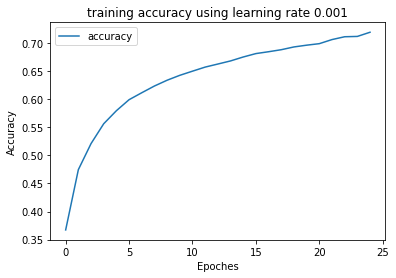

In [6]:
plt.plot(history1.history['accuracy'], label='accuracy')
plt.xlabel('Epoches')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.title('training accuracy using learning rate 0.001')

test_loss, test_acc = LNCNN_model.evaluate(test_images,  test_labels, verbose=2)
print('Test accuracy:',test_acc)

## Question 2.1



### Learning rate = 0.01

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_665 (Conv2D)         (None, 28, 28, 6)         456       
                                                                 
 max_pooling2d_270 (MaxPooli  (None, 14, 14, 6)        0         
 ng2D)                                                           
                                                                 
 conv2d_666 (Conv2D)         (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_271 (MaxPooli  (None, 5, 5, 16)         0         
 ng2D)                                                           
                                                                 
 conv2d_667 (Conv2D)         (None, 1, 1, 120)         4812

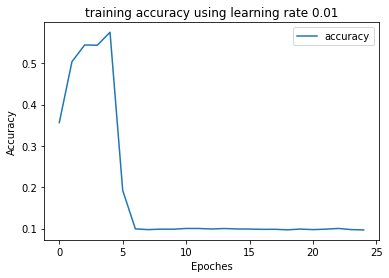

In [93]:
#function model
tf.random.set_seed(5)

input = keras.layers.Input(shape=(32,32,3))
conv1 = keras.layers.Conv2D(6,(5,5),strides=1)(input)
maxpool1 = keras.layers.MaxPooling2D((2,2),strides=2)(conv1)
conv2 = keras.layers.Conv2D(16,(5,5),strides=1)(maxpool1)
maxpool2 = keras.layers.MaxPooling2D((2,2),strides=2)(conv2)
conv3 = keras.layers.Conv2D(120,(5,5))(maxpool2)
flatten = keras.layers.Flatten()(conv3)
dense = keras.layers.Dense(84, activation='relu')(flatten)
output = keras.layers.Dense(10, activation='softmax')(dense)
LNCNN_model_1eN2 = keras.Model(inputs=input, outputs=output)

LNCNN_model_1eN2.summary()

LNCNN_model_1eN2.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-2),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

# Define the Keras TensorBoard callback.
logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

# Training
history = LNCNN_model_1eN2.fit(
    train_images,
    train_labels, 
    batch_size=256,
    epochs=25, 
    callbacks=[tensorboard_callback])

plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('Epoches')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.title('training accuracy using learning rate 0.01')

test_loss, test_acc = LNCNN_model_1eN2.evaluate(test_images,  test_labels, verbose=2)
print('Test accuracy:',test_acc)

### Learning rate = 0.0001

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_671 (Conv2D)         (None, 28, 28, 6)         456       
                                                                 
 max_pooling2d_274 (MaxPooli  (None, 14, 14, 6)        0         
 ng2D)                                                           
                                                                 
 conv2d_672 (Conv2D)         (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_275 (MaxPooli  (None, 5, 5, 16)         0         
 ng2D)                                                           
                                                                 
 conv2d_673 (Conv2D)         (None, 1, 1, 120)         4812

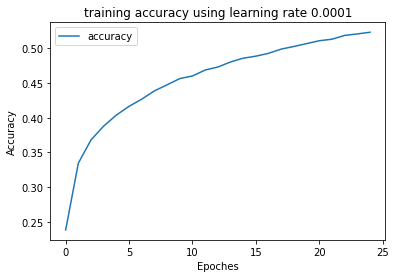

In [95]:
#function model
tf.random.set_seed(5)

input = keras.layers.Input(shape=(32,32,3))
conv1 = keras.layers.Conv2D(6,(5,5),strides=1)(input)
maxpool1 = keras.layers.MaxPooling2D((2,2),strides=2)(conv1)
conv2 = keras.layers.Conv2D(16,(5,5),strides=1)(maxpool1)
maxpool2 = keras.layers.MaxPooling2D((2,2),strides=2)(conv2)
conv3 = keras.layers.Conv2D(120,(5,5))(maxpool2)
flatten = keras.layers.Flatten()(conv3)
dense = keras.layers.Dense(84, activation='relu')(flatten)
output = keras.layers.Dense(10, activation='softmax')(dense)
LNCNN_model_1eN4 = keras.Model(inputs=input, outputs=output)

LNCNN_model_1eN4.summary()

LNCNN_model_1eN4.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

# Define the Keras TensorBoard callback.
logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

# Training
history = LNCNN_model_1eN4.fit(
    train_images,
    train_labels, 
    batch_size=256,
    epochs=25, 
    callbacks=[tensorboard_callback])

plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('Epoches')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.title('training accuracy using learning rate 0.0001')

test_loss, test_acc = LNCNN_model_1eN4.evaluate(test_images,  test_labels, verbose=2)
print('Test accuracy:',test_acc)

### Conclusion

When the learning rate is 0.001, the loss on the training set is 0.8039 and the accuracy is 0.7206. The loss on the test set is 1.0925 and the accuracy is 0.6303. 

When the learning rate is 0.01, the loss on the traning set is 2.3032 and the accuracy is 0.0967. The loss on the test set is 2.3033 and the accuracy is 0.1000. 

When the learning rate is 0.0001, the loss on the training set is 1.3540 and the accuracy is 0.5230. The loss on the test set is 1.3708 and the accuracy is 0.5125.

Based on the results and figures above, we can come to the conclusion that if the learning rate is too high, the model can not converge. If the learning rate is too low, the convergence is too slow. Only a reasonable learning rate can ensure the fast convergence. 

When the learning rate is 0.001, the model have the best performance.

## Question 2.2

### Batch size = 128

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_683 (Conv2D)         (None, 28, 28, 6)         456       
                                                                 
 max_pooling2d_282 (MaxPooli  (None, 14, 14, 6)        0         
 ng2D)                                                           
                                                                 
 conv2d_684 (Conv2D)         (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_283 (MaxPooli  (None, 5, 5, 16)         0         
 ng2D)                                                           
                                                                 
 conv2d_685 (Conv2D)         (None, 1, 1, 120)         481

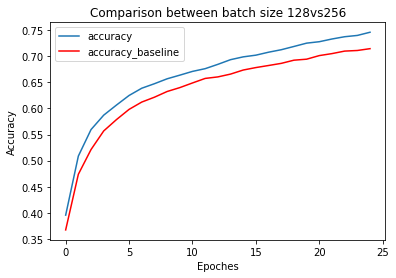

In [102]:
#function model
tf.random.set_seed(5)

input = keras.layers.Input(shape=(32,32,3))
conv1 = keras.layers.Conv2D(6,(5,5),strides=1)(input)
maxpool1 = keras.layers.MaxPooling2D((2,2),strides=2)(conv1)
conv2 = keras.layers.Conv2D(16,(5,5),strides=1)(maxpool1)
maxpool2 = keras.layers.MaxPooling2D((2,2),strides=2)(conv2)
conv3 = keras.layers.Conv2D(120,(5,5))(maxpool2)
flatten = keras.layers.Flatten()(conv3)
dense = keras.layers.Dense(84, activation='relu')(flatten)
output = keras.layers.Dense(10, activation='softmax')(dense)
LNCNN_model_B128 = keras.Model(inputs=input, outputs=output)

LNCNN_model_B128.summary()

LNCNN_model_B128.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

# Define the Keras TensorBoard callback.
logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

# Training
history = LNCNN_model_B128.fit(
    train_images,
    train_labels, 
    batch_size=128,
    epochs=25, 
    callbacks=[tensorboard_callback])

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history1.history['accuracy'], label='accuracy_baseline',c = 'r')
plt.xlabel('Epoches')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.title('Comparison between batch size 128vs256')

test_loss, test_acc = LNCNN_model_B128.evaluate(test_images,  test_labels, verbose=2)
print('Test accuracy:',test_acc)

### Batch size = 512

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 6)         456       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 6)        0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 1, 1, 120)         4812

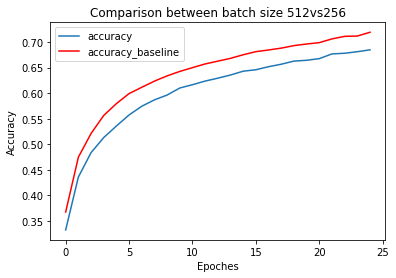

In [8]:
#function model
tf.random.set_seed(5)

input = keras.layers.Input(shape=(32,32,3))
conv1 = keras.layers.Conv2D(6,(5,5),strides=1)(input)
maxpool1 = keras.layers.MaxPooling2D((2,2),strides=2)(conv1)
conv2 = keras.layers.Conv2D(16,(5,5),strides=1)(maxpool1)
maxpool2 = keras.layers.MaxPooling2D((2,2),strides=2)(conv2)
conv3 = keras.layers.Conv2D(120,(5,5))(maxpool2)
flatten = keras.layers.Flatten()(conv3)
dense = keras.layers.Dense(84, activation='relu')(flatten)
output = keras.layers.Dense(10, activation='softmax')(dense)
LNCNN_model_B512 = keras.Model(inputs=input, outputs=output)

LNCNN_model_B512.summary()

LNCNN_model_B512.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

# Define the Keras TensorBoard callback.
logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

# Training
history = LNCNN_model_B512.fit(
    train_images,
    train_labels, 
    batch_size=512,
    epochs=25, 
    callbacks=[tensorboard_callback])

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history1.history['accuracy'], label='accuracy_baseline',c = 'r')
plt.xlabel('Epoches')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.title('Comparison between batch size 512vs256')

test_loss, test_acc = LNCNN_model_B512.evaluate(test_images,  test_labels, verbose=2)
print('Test accuracy:',test_acc)

### Conclusion

The baseline for the batch size experiment is: On training set, loss is 0.8040, accuracy is 0.7193. On testing set, loss is 1.3708, accuracy is 0.5125.

When batch size is 128, on training set, loss is 0.7324, accuracy is 0.7457. On testing set, loss is 1.1701, accuracy is 0.6221.

When batch size is 256, on training set, loss is 0.8991, accuracy is 0.6849. On testing set, loss i s1.0875, accuracy is 0.6245.

In this experiment, the smaller the batch size is, the better performance the model can have. 

In this experiment, when the batch size is 128, the model has the best performance.

## Question 2.3

In the experiments above, we tried 3 different learning rate and 3 different batch size. 

When the learning rate is 0.001 and the batch size is 128, the model can have the best performance. 

## Question 2.4

### Hi, there. The following cell have been sucessfully excuted and the result is shown in the follwoing text cell. However, when I wanted to rerun this cell, Google Colab forced me off the GPU computing and the excution of the following cell took too much time. I couldn't rerun it and get the result before I submit this assignment. But if you are correcting this part of the assignment, you could run the following cell without mistake and get the similar result as I concluded in the conclusion part.

In [4]:
#import dataset
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()
# Normalization
train_images, test_images = train_images / 255.0, test_images / 255.0

#function model
tf.random.set_seed(5)

input = keras.layers.Input(shape=(32,32,3))
flatten = keras.layers.Flatten()(input)
dense = keras.layers.Dense(456, activation='relu')(flatten)
dense = keras.layers.Dense(2416, activation='relu')(dense)
dense = keras.layers.Dense(48120, activation='relu')(dense)
output = keras.layers.Dense(10, activation='softmax')(dense)
FNN_model = keras.Model(inputs=input, outputs=output)

# FNN_model.summary()

#compile
FNN_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

# Define the Keras TensorBoard callback.
logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

# Train the model.
history = FNN_model.fit(
    train_images,
    train_labels, 
    batch_size=128,
    epochs=25, 
    callbacks=[tensorboard_callback])

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history1.history['accuracy'], label='accuracy_CNN',c= 'r')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.title('Comparison between model CNNvsFNN')

# Evaluate
test_loss, test_acc = FNN_model.evaluate(test_images,  test_labels, verbose=2)
print('Test accuracy:',test_acc)

170498071/170498071 [==============================] - 11s 0us/step
Epoch 1/25
 28/391 [=>............................] - ETA: 19:30 - loss: 3.1972 - accuracy: 0.1136

KeyboardInterrupt: ignored

### 2.4.a

On training set, the FNN have the loss at 2.023 and the accuracy at 0.2072. On testing set, the FNN have the loss at 2.0175 and the accuracy at 0.2102.

The performance is not satisfying at all.

In [ ]:
FNN_model.summary()


### 2.4.b

There are 119292650 parameters. They are not worth it.

# Question 3

## 3.1

The dimension of the input is 6x6x1.

The dimentsion of the kernel is 3x3x1.

There are $(h\cdot w\cdot d +1)n=(3\times 3 \times 1 +1)\times 1=10$ parameters (bias considered, if not consider the bias, then there are 9 parameters).



## 3.2

In [12]:
import numpy as np

X = np.array([[7,5,0,0,3,2],[6,4,5,1,4,8],[9,0,2,2,5,4],[6,3,4,7,9,8],[5,7,5,6,9,0],[7,9,0,8,2,3]])
kernel = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])

def my_CVLT(input, kernel):
  m,n = kernel.shape
  if(m==n):
    x,y = input.shape
    x=x-m+1
    y=y-m+1
    output = np.zeros((x,y))
    for i in range(x):
      for j in range(y):
        output[i][j] = np.sum(input[i:i+m,j:j+m]*kernel)
  return output
activation_map = my_CVLT(X,kernel)
print(activation_map)


[[ 16.   9.  -4. -18.]
 [ 17.  -5. -10. -12.]
 [ 11.  -9. -17.   2.]
 [  9.  -1. -15.  16.]]


Above is the Activation map when we apply the convolutional operation using the given filter.

## 3.3


In [15]:
def my_Maxpooling(input,pool_size = 2):
  x,y = input.shape
  m = int(0.5*x)
  n = int(0.5*y)
  output = np.zeros((m,n))
  # print(output.shape)
  for i in range(m):
    for j in range(m):
      output[i][j] = np.max(input[i*pool_size:(i+1)*pool_size,j*pool_size:(j+1)*pool_size])
  return output
max_pooling_output = my_Maxpooling(activation_map)
print(max_pooling_output)

(2, 2)
[[17. -4.]
 [11. 16.]]


Above is the output of the max-pooling layer.